In [1]:
import numpy as np
from numpy import asarray
from matplotlib import image
from PIL import Image
from matplotlib import pyplot as plt

In [2]:
# Convert image
def convert_image_to_array(filename):
    #load image
    image = Image.open(filename)
    # convert image to numpy array
    px_np = asarray(image)
    return px_np

### Thay đổi độ sáng ảnh

In [3]:
# Keep pixel value in [0..255]
def truncate(value):
    if (value < 0):
        return 0
    if (value > 255):
        return 255
    return value

def change_brightness(img, brightness):
    np_img = np.zeros((img.shape[0], img.shape[1], img.shape[2]))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(img.shape[2]):
                np_img[i,j,k] = truncate(img[i,j,k] + brightness)
    return np_img

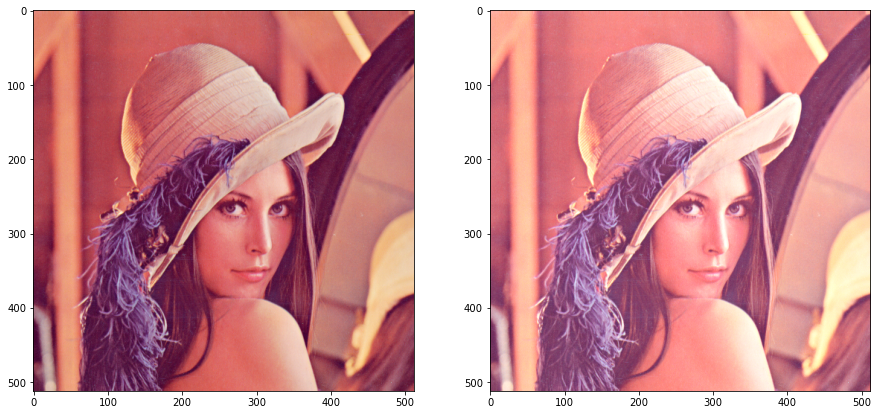

In [4]:
# Ảnh gốc
org_img = convert_image_to_array('Lenna_(test_image).png')
# ảnh sau khi thay đổi độ sáng
bright_img = change_brightness(org_img, 40).astype(int)

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(15,15))
axs[0].imshow(org_img)
axs[1].imshow(bright_img)

### Thay đổi độ tương phản của ảnh

In [5]:
def change_contrast(img, level):
    factor = (259 * (level + 255)) / (255 * (259 - level))
    def contrast(c):
        return 128 + factor * (c - 128)
    return img.point(contrast)

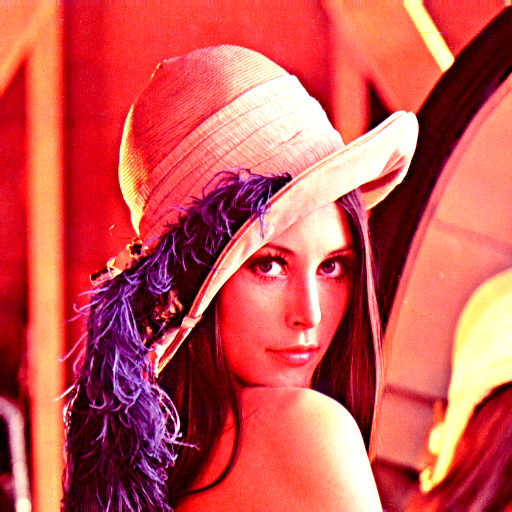

In [6]:
img = Image.open('Lenna_(test_image).png')
change_contrast(img, 90)

### Chuyển sang ảnh xám:

In [7]:
def grayscale(image):
    weight = np.array([0.3,0.59,0.11]) # weight of chanel: red green blue
    new_img = np.dot(image,weight)
    return new_img
    

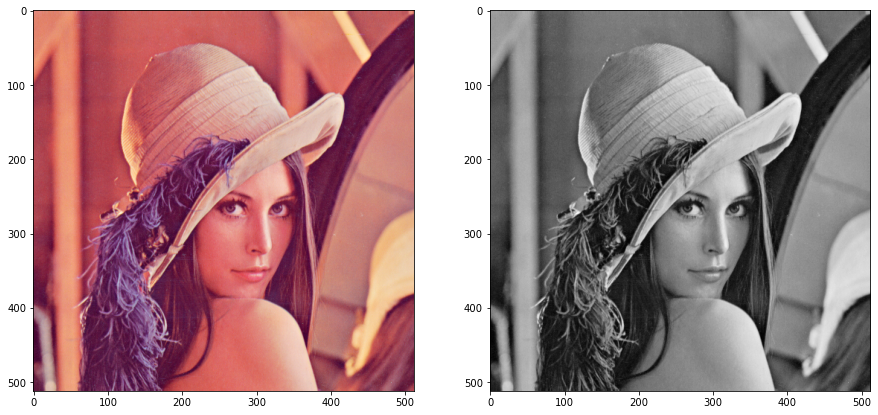

In [8]:
org_image = Image.open('Lenna_(test_image).png')
gray_img = grayscale(org_image)
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(15,15))
axs[0].imshow(org_image)
axs[1].imshow(gray_img,cmap='gray')

#gray_img

### Chồng 2 ảnh 

In [9]:
def collage(img1, img2):
    new_img = np.zeros((img1.shape[0], img1.shape[1], img1.shape[2]))
    for i in range(img1.shape[0]):
        for j in range(img1.shape[1]):
            for k in range(img1.shape[2]):
                #t1 = float(img1[i,j,k])
                #t2 = float(img2[i,j,k])
                #new_img[i,j,k] = truncate(t1 - t2)
                #----
                if img1[i,j,k] > img2[i,j,k]:
                    new_img[i,j,k] = img2[i,j,k]
                else:
                    new_img[i,j,k] = img1[i,j,k]
    return new_img

In [ ]:
# Load  image
img1 = convert_image_to_array('test4.jpg')
img2 = convert_image_to_array('test3.png')

# Thực hiện chồng ảnh
A = collage(img1, img2)
# Show
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(15,15))
axs[0].imshow(img1)
axs[1].imshow(img2)
axs[2].imshow(A.astype(int))

### Làm mờ ảnh

In [10]:
#Box blur
#kernel.size = 3x3
#Ở đây ta convoluve với stride=1, padding =0

def convoluve2d(chanels, kernel): #convoluve one chanel
    new_chanel = np.copy(chanels) 
    for i in range(1, chanels.shape[0] - 1):
        for j in range(1,chanels.shape[1]-1):
            cur_pixel = [i,j] #current pixel
            center_filter = [1,1]
            xRows = [0,0,1,-1,1,-1,1,-1]
            yCols = [-1,1,0,0,-1,-1,1,1]
            
            new_pixel = 0 #new value of current pixel
            
            for k in range(8):
                item= [xRows[k], yCols[k]]
                # index pixel in image
                ind_img_x = cur_pixel[0] + item[0] 
                ind_img_y = cur_pixel[1] + item[1] 
                # index pixel in filter(kernel)
                ind_fil_x = center_filter[0] + item[0]
                ind_fil_y = center_filter[1] + item[1]
                
                new_pixel += chanels[ind_img_x,ind_img_y] * kernel[ind_fil_x][ind_fil_y]
            new_pixel += chanels[i,j] * kernel[1][1]
            if new_pixel < 0:
                new_pixel = 0
            if new_pixel >255:
                new_pixel = 255
            new_chanel[i,j] = new_pixel*1
    return new_chanel
            
    

In [11]:
def blurring(image, kernel):
    blur_img = []
    for c in range(image.shape[2]): # ndim = nchanels
        new_chanel = convoluve2d(image[:,:,c], kernel)
        blur_img.append(new_chanel)
    return np.stack(blur_img,axis =2).astype("uint8")

In [12]:
# kernel for blurring
kernel= np.ones((3,3))
kernel/=np.sum(kernel)

In [13]:
# gaussian kernel - used for blurring
kernel_g = np.array([[1,2,1],
                   [2,4,2],
                   [1,2,1]])
kernel_g =kernel_g/ np.sum(kernel_g)

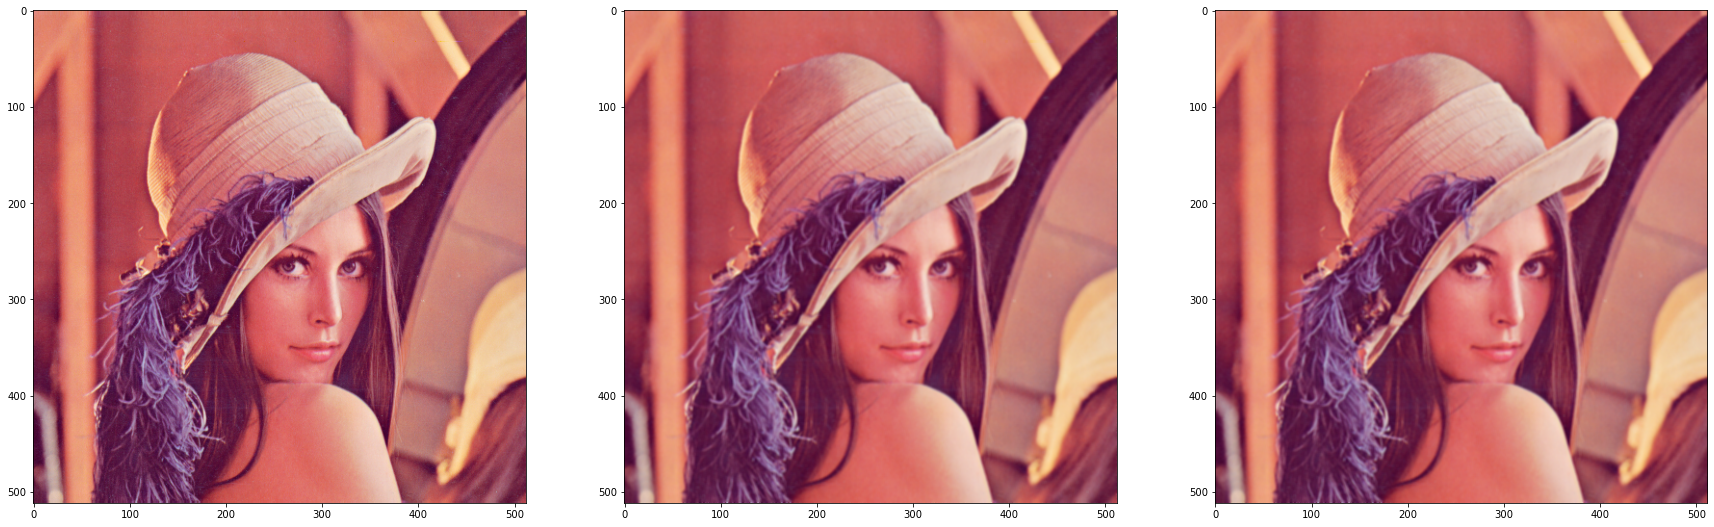

In [14]:
blur_img = blurring(org_img, kernel)
blurG_img = blurring(org_img, kernel) # blurring used gausian kernel
 # show
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(30,30))
axs[0].imshow(org_img)
axs[1].imshow(blur_img)
axs[2].imshow(blurG_img)

### Lật ảnh ngang- dọc

In [15]:
def flipping(image, axis): # axis - chiều lật
    new_img = image.copy()
    width, height = image.size
    
    if axis==1: #flip x-axis
        for x in range(0, width):   # Only process the half way
            for y in range(0, int(height/2)):
                # swap pixel and pixel2
                  ## getpixel: lấy giá trị pixel - tham số truyền là tọa độ pixel
                pixel = new_img.getpixel((x, y))
                pixel2 = new_img.getpixel((x, (height-1-y)))
                new_img.putpixel((x,y), pixel2)
                new_img.putpixel((x,(height-1-y)), pixel)
    # default flip image y-axis
    for x in range(0, int(width/2)):   # Only process the half way
        for y in range(0, height):
                # swap pixel and pixel2
            pixel = new_img.getpixel((x, y))
            pixel2 = new_img.getpixel(((width-1-x), y))
            new_img.putpixel((x,y), pixel2)
            new_img.putpixel(((width-1-x), y), pixel)
        
    return new_img

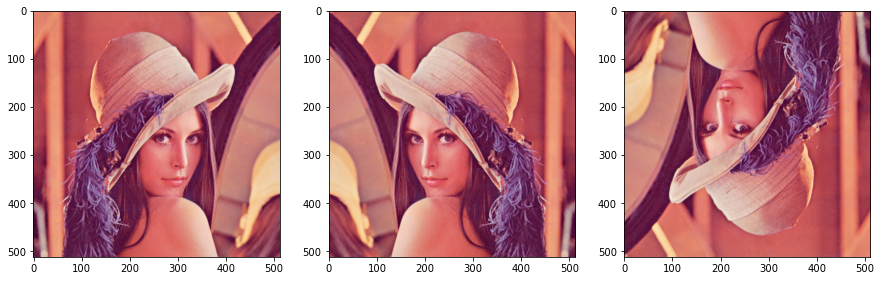

In [16]:
flip_ngang = flipping(org_image, 0) #lật ngang
flip_doc = flipping(org_image,1) # lật dọc
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(15,15))
axs[0].imshow(org_img)
axs[1].imshow(flip_ngang)
axs[2].imshow(flip_doc)
